Enter the energy value: 10
Enter the number of molecules: 4
Here are all of the configurations: 
[(1, 1, 1, 7), (1, 3, 3, 3), (1, 1, 3, 5), (2, 2, 3, 3), (1, 2, 2, 5), (2, 2, 2, 4), (1, 2, 3, 4), (1, 1, 4, 4), (1, 1, 2, 6)]

Here are the total number of configurations:
9

[1, 1, 1, 7, 1, 3, 3, 3, 1, 1, 3, 5, 2, 2, 3, 3, 1, 2, 2, 5, 2, 2, 2, 4, 1, 2, 3, 4, 1, 1, 4, 4, 1, 1, 2, 6]

Here are the number of states for each configuration:
[4.0, 4.0, 12.0, 6.0, 12.0, 4.0, 24.0, 6.0, 12.0]

Here is the sum of all of the states:
84.0

Here are the probabilities of each configuration:
[0.047619047619047616, 0.047619047619047616, 0.14285714285714285, 0.07142857142857142, 0.14285714285714285, 0.047619047619047616, 0.2857142857142857, 0.07142857142857142, 0.14285714285714285]

Here are the expectation values of the levels (in order):
[1.3333333333333335, 1.0, 0.7142857142857142, 0.47619047619047616, 0.2857142857142857, 0.14285714285714285, 0.047619047619047616, 0.0, 0.0, 0.0]


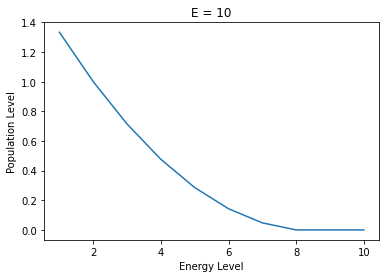

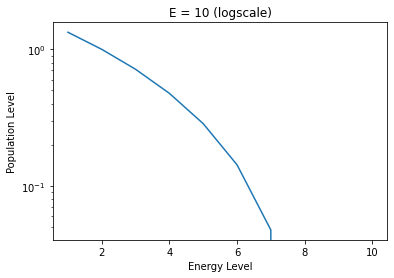

In [7]:
from sympy.abc import x, y 
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt


energy = int(input("Enter the energy value: "))
molec = int(input("Enter the number of molecules: "))

def partition(number):
        answer = set()
        answer.add((number,))
        for x in range(1, number):
            for y in partition(number - x):
                answer.add(tuple(sorted((x, ) + y)))
        return answer
totPart = list(partition(energy))  
store = []

for x in range(0, len(totPart)):
    if (len(totPart[x]) == molec):
        store.append(totPart[x])
print('Here are all of the configurations: ') 
print (store)
print("")
print ('Here are the total number of configurations:') 
print (len(store))
print("")


storeNew = []

for x in store:
    storeNew.extend(x[:5])

print (storeNew)
print("")

z1 = 0
z2 = 1
z3 = 2
z4 = 3
state = 24
repeat = 1
states = []

while (z4 < len(storeNew)):
    if (storeNew[z1]==storeNew[z2])and (storeNew[z2]==storeNew[z3]) and (storeNew[z3]==storeNew[z4]):
        repeat = 24
    
    elif (storeNew[z1]!=storeNew[z2]) and (storeNew[z2]!=storeNew[z3]) and (storeNew[z3]!= storeNew[z4]):
        repeat = 1
    
    elif (storeNew[z1]==storeNew[z2]) and (storeNew[z2]!=storeNew[z3]) and (storeNew[z3]!= storeNew[z4]):
        repeat = 2
    
    elif (storeNew[z1]!=storeNew[z2]) and (storeNew[z2]==storeNew[z3]) and (storeNew[z3]!= storeNew[z4]):
        repeat = 2
    
    elif (storeNew[z1]!=storeNew[z2]) and (storeNew[z2]!=storeNew[z3]) and (storeNew[z3]== storeNew[z4]):
        repeat = 2
        
    elif (storeNew[z1]==storeNew[z2]) and (storeNew[z2]!=storeNew[z3]) and (storeNew[z3]== storeNew[z4]):
        repeat = 4
        
    elif (storeNew[z1]==storeNew[z2]) and (storeNew[z2]==storeNew[z3]) and (storeNew[z3]!= storeNew[z4]):
        repeat = 6
        
    elif (storeNew[z1]!=storeNew[z2]) and (storeNew[z2]==storeNew[z3]) and (storeNew[z3]== storeNew[z4]):
        repeat = 6

    states.append(state/repeat)
    z1 = z1 + 4
    z2 = z2 + 4
    z3 = z3 + 4
    z4 = z4 + 4

print ('Here are the number of states for each configuration:' )
print (states)
print("")

totalStates = 0
for x in states:
    totalStates = totalStates + x
print ('Here is the sum of all of the states:') 
print (totalStates)
print("")

probabilities = []
probability = 0
for x in states:
    probability = (float(x)/totalStates)
    probabilities.append(probability)
print ('Here are the probabilities of each configuration:') 
print (probabilities)
print("")

n = 0;
a1 = 0
a2 = 1
a3 = 2
a4 = 3
counter = 0
summ = 0
index = 0
expectation = []

while n < energy :
    n = n + 1
    while (a4 < len(storeNew)) :
        if (storeNew[a1] == n):
            counter = counter + 1
        if (storeNew[a2] == n):
            counter = counter + 1
        if (storeNew[a3] == n):
            counter = counter + 1
        if (storeNew[a4] == n):
            counter = counter + 1
        summ = summ + (counter*float(probabilities[index]))
        a1 = a1 + 4
        a2 = a2 + 4
        a3 = a3 + 4
        a4 = a4 + 4
        index = index + 1
        counter = 0
    expectation.append(summ)
    a1 = 0
    a2 = 1
    a3 = 2
    a4 = 3
    summ = 0
    index = 0
    
print ('Here are the expectation values of the levels (in order):' )
print (expectation)

xAxis = []
for x in range(1,energy+1):
    xAxis.append(x)
    
plt.plot(xAxis, expectation)
plt.title('E = '+str(energy))
plt.xlabel('Energy Level')
plt.ylabel('Population Level')
plt.show()

plt.plot(xAxis, expectation)
plt.yscale('log')
plt.title('E = '+str(energy) +' (logscale)')
plt.xlabel('Energy Level')
plt.ylabel('Population Level')
plt.show()


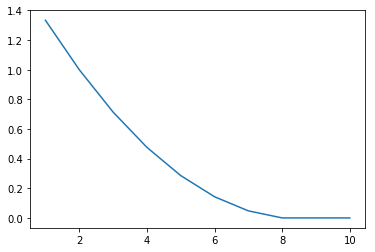

In [23]:
import matplotlib.pyplot as plt

plt.plot([1,2,3,4,5,6,7,8,9,10],[1.3333333333333335, 1.0, 0.7142857142857142, 0.47619047619047616, 0.2857142857142857, 0.14285714285714285, 0.047619047619047616, 0.0, 0.0, 0.0] )